In [1]:
__author__ = "@Tssp"
__date__   = "15/04/21"
import sympy as sp
from sympy.abc import n, x, a, b
import numpy as np
import matplotlib.pyplot as plt
from method import Chebyshev_Expansion, np_Chebyshev

In [2]:
Vo_sym, k_sym, xi_sym, L_sym, V_plane_sym = sp.symbols('V_0 k \\xi L V_p')

In [3]:
kb = 8.617e-5               # a.u
ao = 5.2917720859e-11       # a.u
Vo = kb * 2e-6              # a.u
V_plane = 0.0 * Vo         # a.u
L = 35e-6/ao                # a.u
k = 2*np.pi/(532e-9/ao)     # a.u
xi = (Vo + (L/2)**12)**(1/12)# a.u
params = {k_sym: k,
         Vo_sym: Vo,
         xi_sym: xi,
         L_sym: L,
         V_plane_sym: V_plane}
print(f'''
       Parameters
------------------------
Vo[a.u]:      {Vo}
V_plane[a.u]: {V_plane}
L[a.u]:       {L}
wL[nm]:       {532}
k[a.u]:       {k}
xi[a.u]:      {xi}
''')


       Parameters
------------------------
Vo[a.u]:      1.7234e-10
V_plane[a.u]: 0.0
L[a.u]:       661404.146509975
wL[nm]:       532
k[a.u]:       0.0006249846732907886
xi[a.u]:      330702.07325498725



In [4]:
V = sp.Piecewise((Vo_sym, x<=-xi_sym), (x**12 + a, x<=-L_sym/2), (0, x<=L_sym/2),\
                (x**12 + a, x<=xi_sym), (Vo_sym, x>=xi_sym))
V

Piecewise((V_0, \xi <= -x), (a + x**12, x <= -L/2), (0, x <= L/2), (a + x**12, \xi >= x), (V_0, \xi <= x))

Continuity conditions leads to:
$$ \xi = (V_0 + (L/2)^{12})^{1/12}$$
$$a = -(L/2)^{12}$$

In [5]:
V = sp.Piecewise((Vo_sym, x<=-xi_sym), (x**12 - (L_sym/2)**12, x<=-L_sym/2), (0, x<=L_sym/2),\
                (x**12 - (L_sym/2)**12, x<=xi_sym), (Vo_sym, x>=xi_sym))
V = V.subs({xi_sym: (Vo_sym + (L_sym/2)**12)**(1/12)})
V

Piecewise((V_0, x <= -(L**12/4096 + V_0)**0.0833333333333333), (-L**12/4096 + x**12, x <= -L/2), (0, x <= L/2), (-L**12/4096 + x**12, x <= (L**12/4096 + V_0)**0.0833333333333333), (V_0, x >= (L**12/4096 + V_0)**0.0833333333333333))

In [6]:
# Dimensionless
V = V.subs({x: x*(xi_sym + L_sym)})
V

Piecewise((V_0, x*(L + \xi) <= -(L**12/4096 + V_0)**0.0833333333333333), (-L**12/4096 + x**12*(L + \xi)**12, L/2 <= -x*(L + \xi)), (0, L/2 >= x*(L + \xi)), (-L**12/4096 + x**12*(L + \xi)**12, x*(L + \xi) <= (L**12/4096 + V_0)**0.0833333333333333), (V_0, x*(L + \xi) >= (L**12/4096 + V_0)**0.0833333333333333))

In [7]:
k_value = 100
Vo_value= 1
L_value = 1
xi_value= (Vo_value + (L_value/2)**12)**(1/12)
params = {k_sym: k_value,
         Vo_sym: Vo_value,
         xi_sym: xi_value,
         L_sym: L_value}

In [8]:
V_function = V.subs(params)
V_function

Piecewise((1, 2.00002034277587*x <= -1.00002034277587), (4096.49997202896*x**12 - 1/4096, 2.00002034277587*x <= -1/2), (0, 2.00002034277587*x <= 1/2), (4096.49997202896*x**12 - 1/4096, 2.00002034277587*x <= 1.00002034277587), (1, 2.00002034277587*x >= 1.00002034277587))

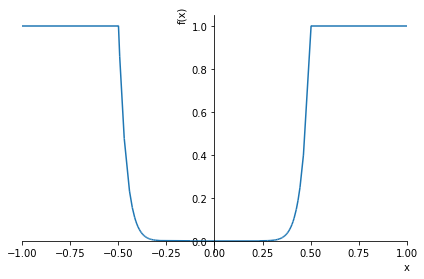

In [9]:
sp.plotting.plot(V.subs(params), xlim=(-1, 1))

## With arrays

In [10]:
xI   = np.linspace(-2*xi_value, -xi_value, endpoint=False)/(xi_value + L_value) 
xII  = np.linspace(-xi_value, -L_value/2, endpoint=False)/(xi_value + L_value)
xIII = np.linspace(-L_value/2, L_value/2, endpoint=False)/(xi_value + L_value)
xIV  = np.linspace(L_value/2, xi_value, endpoint=False)/(xi_value + L_value)
xV   = np.linspace(xi_value, 2*xi_value, endpoint=False)/(xi_value + L_value)
x    = np.concatenate((xI, xII, xIII, xIV, xV))

In [11]:
VI  = Vo_value*np.ones(xI.size)
VII = (xII*(xi_value + L_value))**12 - (L_value/2)**12
VIII= np.zeros(xIII.size)
VIV = (xIV*(xi_value + L_value))**12 - (L_value/2)**12
VV  = Vo_value*np.ones(xV.size)
V = np.concatenate((VI, VII, VIII, VIV, VV))

In [20]:
#for i in range(51):
#    fig, ax = plt.subplots(figsize=(8, 6))
#    P = np.polynomial.Chebyshev.fit(x, V, i)
#    plt.plot(x, V)
#    plt.xlim(-1, 1)
#    plt.plot(x, P(x))
#    #plt.xticks([-xi_value, -L_value/2, 0, L_value/2, xi_value], [r'$-\xi$', r'$-L/2$', r'$0$', r'$L/2$', r'$\xi$'])
#    plt.xlabel('$x$', fontsize=18)
#    plt.legend([r'$V(x)$', 'Chebyshev fit'])
#    plt.title(f'Order of Chebyshev expansion: {i}')
#    plt.savefig(f'Figures_For_Gif/Cheby_gif{i}')

In [21]:
#import imageio, os
#images = []
#for i in range(51):
#    images.append(imageio.imread(f'Figures_For_Gif/Cheby_gif{i}.png'))
#imageio.mimsave('Figures_For_Gif/Cheby_gif.gif', images)

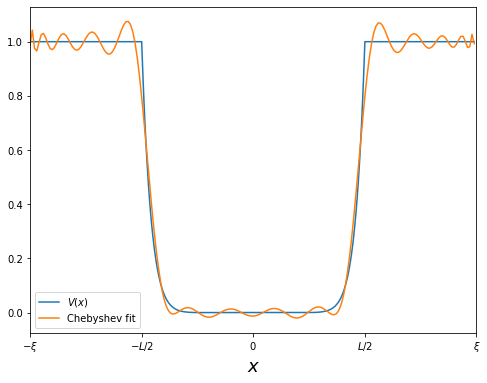

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
P = np.polynomial.Chebyshev.fit(x, V, 28)
plt.plot(x, V)
plt.xlim(-1, 1)
plt.plot(x, P(x))
plt.xticks([-xi_value, -L_value/2, 0, L_value/2, xi_value], [r'$-\xi$', r'$-L/2$', r'$0$', r'$L/2$', r'$\xi$'])
plt.xlabel('$x$', fontsize=18)
plt.legend([r'$V(x)$', 'Chebyshev fit'])